In [21]:
import os
import glob
import numpy as np
import pandas as pd
import analyze2p.aggregate_datasets as aggr
import analyze2p.extraction.traces as traceutils

In [121]:
def get_trial_df(rd):
    '''
    From stacked neuraldf (1 roi's responses), return NtrialxNconfigs df.
    Add offset for calculating index.
    '''
    # Single value per trial, columns=configs, rows=trial
    trial_vals = pd.concat([pd.Series(g['response'], name=c).reset_index(drop=True)\
                              for c, g in rd.groupby(['config'])], axis=1)
    return trial_vals

In [7]:
trial_epoch='stimulus'
experiment='gratings'
visual_areas=['V1', 'Lm', 'Li']

In [8]:
va='V1'
dk='20191006_JC110_fov1'

In [9]:
sdata, cells0 = aggr.get_aggregate_info(visual_areas=visual_areas, return_cells=True)
curr_cells = cells0[(cells0.visual_area==va) & (cells0.datakey==dk)]

/n/coxfs01/julianarhee/aggregate-visual-areas/dataset_info_assigned.pkl
Segmentation: missing 13 dsets


In [22]:
traceid='traces001'
response_type='dff'
responsive_test='ROC'
responsive_thr=0.05

In [117]:
ndf_wide = aggr.get_neuraldf(dk, experiment='gratings', traceid=traceid,
                   epoch=trial_epoch, response_type=response_type,
                   responsive_test=responsive_test, responsive_thr=responsive_thr)
ndf_long = pd.melt(ndf_wide, id_vars=['config'], 
              var_name='cell', value_name='response')
all_cells = curr_cells['cell'].unique()
ndf = ndf_long[ndf_long['cell'].isin(all_cells)]


In [126]:
sdf = aggr.get_stimuli(dk, experiment='gratings')
sdf

,direction,luminance,stimtype,xpos,ypos,ori,position,speed,sf,size
config001,0,None,gratings,0.0,0.0,0,"(0, 0)",10,0.1,60.0
config002,0,None,gratings,0.0,0.0,45,"(0, 0)",10,0.1,60.0
config003,0,None,gratings,0.0,0.0,90,"(0, 0)",10,0.1,60.0
config004,0,None,gratings,0.0,0.0,135,"(0, 0)",10,0.1,60.0
config005,0,None,gratings,0.0,0.0,180,"(0, 0)",10,0.1,60.0
config006,0,None,gratings,0.0,0.0,225,"(0, 0)",10,0.1,60.0
config007,0,None,gratings,0.0,0.0,270,"(0, 0)",10,0.1,60.0
config008,0,None,gratings,0.0,0.0,315,"(0, 0)",10,0.1,60.0


In [118]:
rdf_list = [g for rid, g in ndf.groupby('cell')]


In [120]:
print(va, dk)
rdf_list[0]

Li 20190314_JC070_fov1


,config,cell,response
960,config002,59,0.413191
961,config003,59,0.116040
962,config005,59,0.196228
963,config006,59,0.224393
964,config007,59,0.054360
...,...,...,...
1035,config007,59,0.168790
1036,config003,59,0.091407
1037,config001,59,0.069557
1038,config004,59,0.056039


In [123]:
rid = 59 # prefers smaller size, SF HIGH
# rid=46
roi_resp = ndf[(ndf['cell']==rid)].copy()
trialdf = get_trial_df(roi_resp)
meanr = trialdf.mean(axis=0)


In [124]:
meanr
meanr_c = meanr.copy()


config001    0.101810
config002    0.113174
config003    0.078639
config004    0.052955
config005    0.046207
config006    0.050097
config007    0.087820
config008    0.050460
dtype: float64

In [54]:
importlib.reload(gutils)

<module 'analyze2p.gratings.utils' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/gratings/utils.py'>

In [55]:
#test = gutils.fit_nonori_params(va, dk)


/n/coxfs01/julianarhee/aggregate-visual-areas/dataset_info_assigned.pkl
Segmentation: missing 13 dsets
   saved.


In [56]:
test

value  reject_null
cell param                         
5    sf      -0.314664         True
     size    -0.401966         True
     speed   -0.101637        False
     ori    270.000000         True
6    sf      -0.147684         True
...                ...          ...
387  ori    270.000000         True
390  sf       0.013838        False
     size    -0.205493         True
     speed    0.012430        False
     ori    180.000000         True

[356 rows x 2 columns]

In [ ]:
# def fit_nonori_params(va, dk, responsive_test='ROC', responsive_thr=0.05,
#                       trial_epoch='stimulus', n_iterations=100,
#                       param_list=['sf', 'size', 'speed'],
#                       n_bootstrap_iters=500, ci=95,
#                       response_type='dff', traceid='traces001', 
#                       visual_areas=['V1', 'Lm', 'Li']):
#     # Get fit dir
#     ori_fit_desc = get_fit_desc(response_type=response_type,
#                             responsive_test=responsive_test, 
#                             responsive_thr=responsive_thr, 
#                             n_bootstrap_iters=n_bootstrap_iters)
#     traceid_dir = traceutils.get_traceid_dir(dk, 'gratings', traceid='traces001')
#     fitdirs = glob.glob(os.path.join(traceid_dir, 'tuning*', ori_fit_desc))
#     if len(fitdirs)==0:
#         print("no fits: %s" % dk)
#         return None
#     # outfile
#     fitdir=fitdirs[0]
#     tmp_fov_outfile = os.path.join(fitdir, 'results_nonori_params.pkl')
    
#     # Get cells in area
#     sdata, cells0 = aggr.get_aggregate_info(visual_areas=visual_areas, 
#                                             return_cells=True)
#     curr_cells = cells0[(cells0.visual_area==va) & (cells0.datakey==dk)]
#     # Get stimuli
#     sdf = aggr.get_stimuli(dk, experiment='gratings')
#     # Get neuraldata
#     ndf_wide = aggr.get_neuraldf(dk, experiment='gratings', traceid=traceid,
#                        epoch=trial_epoch, response_type=response_type,
#                        responsive_test=responsive_test, responsive_thr=responsive_thr)
#     ndf_long = pd.melt(ndf_wide, id_vars=['config'], 
#                   var_name='cell', value_name='response')
#     all_cells = curr_cells['cell'].unique()
#     ndf = ndf_long[ndf_long['cell'].isin(all_cells)]
    
#     # Get preference index for all cells in FOV that pass
#     ixs_ = ndf.groupby('cell').apply(bootstrap_nonori_index,\
#                              sdf, param_list=param_list, offset=offset,
#                              n_iterations=n_iterations, ci=ci)
#     # Save iter results
#     with open(tmp_fov_outfile, 'wb') as f:
#         pkl.dump(ixs_, f, protocol=2)
#     print("   saved.")
    
#     return ixs_

In [68]:
ori_fit_desc = gutils.get_fit_desc(response_type=response_type, responsive_test=responsive_test, 
                            responsive_thr=responsive_thr, 
                            n_bootstrap_iters=500)

In [90]:
importlib.reload(gutils)

<module 'analyze2p.gratings.utils' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/gratings/utils.py'>

In [69]:
traceid_dir = traceutils.get_traceid_dir(dk, 'gratings', traceid='traces001')
fitdirs = glob.glob(os.path.join(traceid_dir, 'tuning*', ori_fit_desc))
if len(fitdirs)==0:
    print("no fits: %s" % dk)

fitdir=fitdirs[0]
tmp_fov_outfile = os.path.join(fitdir, 'results_nonori_params.pkl')
os.path.exists(tmp_fov_outfile)

True

In [71]:
with open(tmp_fov_outfile, 'rb') as f:
    res = pkl.load(f)

In [91]:
rois_ = curr_cells[(curr_cells.visual_area==va) & (curr_cells.datakey==dk)]['cell'].unique()
len(rois_)

391

In [92]:
currfits = res[res['cell'].isin(rois_)]


In [93]:
prefs_ = gutils.count_preference_metrics(currfits) #, param_list=param_list)
prefs_

,n_pass,n_total,n_pref_low,n_pref_high,param
0,44,89,42,2,sf
1,72,89,70,2,size
2,4,89,4,0,speed


In [78]:
len(rois_)

391

In [79]:
len(res['cell'].unique())

89

In [82]:
len(currfits['cell'].unique())


89

In [85]:
pass_ = currfits[currfits.reject_null].copy()
pass_.head()

,value,reject_null,cell
param,,,
sf,-0.312193,True,5
size,-0.402331,True,5
ori,270.000000,True,5
sf,-0.147168,True,6
size,-0.207327,True,6


In [87]:
par='size'
n_pass = pass_[pass_.index.get_level_values('param')==par].shape[0]
n_pass

72

In [89]:
len(pass_[pass_.index.get_level_values('param')==par]['cell'].unique())


72

# Aggregate

In [144]:
import analyze2p.utils as hutils
import pylab as pl
import analyze2p.plotting as pplot
import seaborn as sns

In [146]:
#### Plotting params
visual_areas, area_colors = pplot.set_threecolor_palette()
pplot.set_plot_params(labelsize=6, lw_axes=0.25)
# src dirs
aggregate_dir = '/n/coxfs01/julianarhee/aggregate-visual-areas'
rootdir='/n/coxfs01/2p-data'
traceid = 'traces001'


In [94]:
sdata, cells0 = aggr.get_aggregate_info(visual_areas=visual_areas, return_cells=True)
meta = sdata[sdata.experiment.isin(['gratings'])].copy()

all_dkeys = [(va, dk) for (va, dk), g in meta.groupby(['visual_area', 'datakey'])]
CELLS = pd.concat([g for (va, dk), g in cells0.groupby(['visual_area', 'datakey'])\
                                  if (va, dk) in all_dkeys])
CELLS[['visual_area', 'animalid', 'session', 'fovnum']]\
            .drop_duplicates().groupby(['visual_area']).count()

/n/coxfs01/julianarhee/aggregate-visual-areas/dataset_info_assigned.pkl
Segmentation: missing 13 dsets


,animalid,session,fovnum
visual_area,,,
Li,16,16,16
Lm,10,10,10
V1,9,9,9


In [95]:
gdata, missing_ = gutils.aggregate_ori_fits(CELLS, traceid=traceid, 
                            fit_desc=ori_fit_desc, return_missing=True) 

/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/gratings/utils.py:229: RuntimeWarning: invalid value encountered in sqrt
  gfit = np.mean(bootr['results']['r2']) * (1-iqr) * np.sqrt(r2_comb)


NameError: name 'hutils' is not defined

In [98]:
gdata = hutils.split_datakey(gdata)
gdata['tf'] = gdata['sf']*gdata['speed'] # fit params
# Assign "preferred theta" for tested values
tested_thetas = np.arange(0, 360, 45)
theta_vals = np.arange(0, 360+45, 45)
gdata['tested_theta'] = [theta_vals[np.where(np.abs(t-theta_vals)==np.min(np.abs(t-theta_vals)))[0][0]] % 360. \
                            for t in gdata['theta_pref']]
gdata['tested_theta'] = gdata['tested_theta'].astype(float)

In [99]:
best_gof_ixs = gdata.groupby(['visual_area', 'datakey', 'cell'])['gof']\
                    .transform(max) == gdata['gof']
assert gdata.loc[best_gof_ixs].groupby(['visual_area', 'datakey', 'cell'])\
                    .count().max().max()==1
bestg = gdata.loc[best_gof_ixs].copy()
bestg.groupby(['visual_area']).count()

,response_pref,response_null,theta_pref,sigma,response_offset,asi,dsi,circvar_asi,circvar_dsi,r2,...,gof,sf,size,speed,datakey,animalid,fov,session,tf,tested_theta
visual_area,,,,,,,,,,,,,,,,,,,,,
Li,349,349,349,349,349,349,349,349,349,349,...,349,349,349,349,349,349,349,349,349,349
Lm,422,422,422,422,422,422,422,422,422,422,...,422,422,422,422,422,422,422,422,422,422
V1,861,861,861,861,861,861,861,861,861,861,...,861,861,861,861,861,861,861,861,861,861


In [100]:
# Unique datasets, get dsets with most ncells pass
gof_thr=0.5
min_ncells=0
drop_repeats=True
# ----------------------
counts = bestg[bestg['gof']>gof_thr][['visual_area', 'datakey', 'cell']].drop_duplicates()\
            .groupby(['visual_area', 'datakey']).count().reset_index()
u_dkeys = aggr.drop_repeats(counts)   
all_dkeys = list([tuple(k) for k in \
                  counts[['visual_area', 'datakey']].drop_duplicates().values])
final_dkeys = u_dkeys if drop_repeats else all_dkeys
dset_str = 'drop_repeats' if drop_repeats else 'all_dsets'

FITS = pd.concat([g for (va, dk), g in bestg.groupby(['visual_area', 'datakey'])\
          if (va, dk) in final_dkeys])
print(FITS[['visual_area', 'datakey', 'cell']].drop_duplicates()\
            .groupby(['visual_area']).count())

             datakey  cell
visual_area               
Li               249   249
Lm               411   411
V1               861   861


#### Load neural responses

In [102]:
trial_epoch='stimulus'
experiment='gratings'
NDATA0 = aggr.get_aggregate_data(experiment, traceid=traceid, 
                      response_type=response_type, epoch=trial_epoch,
                      responsive_test=responsive_test, 
                      responsive_thr=responsive_thr)

/n/coxfs01/julianarhee/aggregate-visual-areas/dataset_info_assigned.pkl
Segmentation: missing 13 dsets
...loading: aggr_gratings_trialmeans_traces001_ROC-thr-0.05_dff_stimulus.pkl
Checking gratings configs


In [103]:
NDATA = pd.concat([g for (va, dk), g in NDATA0.groupby(['visual_area', 'datakey'])
                  if (va, dk) in final_dkeys])

In [104]:
responsive_test, responsive_thr

('ROC', 0.05)

In [108]:
p_=[]
for (va, dk), g in NDATA.groupby(['visual_area', 'datakey']):
    rois_ = g['cell'].unique()
    traceid_dir = traceutils.get_traceid_dir(dk, 'gratings', traceid='traces001')
    fitdirs = glob.glob(os.path.join(traceid_dir, 'tuning*', ori_fit_desc))
    if len(fitdirs)==0:
        print("no fits: %s" % dk)
        continue
    fitdir=fitdirs[0]
    tmp_fov_outfile = os.path.join(fitdir, 'results_nonori_params.pkl')
    if not os.path.exists(tmp_fov_outfile):
        missing_.append((va, dk))

    with open(tmp_fov_outfile, 'rb') as f:
        res = pkl.load(f)

    currfits = res[res['cell'].isin(rois_)]
    prefs_ = gutils.count_preference_metrics(currfits) #, param_list=param_list)
    prefs_['visual_area'] = va
    prefs_['datakey'] = dk
    prefs_['n_cells'] = len(rois_)
    p_.append(prefs_)

In [128]:
prefs = pd.concat(p_, axis=0, ignore_index=True)

In [136]:
prefs.head()

,n_pass,n_total,n_pref_low,n_pref_high,param,visual_area,datakey,n_cells,frac_pass
0,22,22,0,0,sf,Li,20190314_JC070_fov1,22,1.0
1,22,22,0,0,size,Li,20190314_JC070_fov1,22,1.0
2,22,22,0,0,speed,Li,20190314_JC070_fov1,22,1.0
3,10,10,0,0,sf,Li,20190315_JC070_fov2,10,1.0
4,10,10,0,0,size,Li,20190315_JC070_fov2,10,1.0


In [135]:
good_sum = prefs['n_pref_low'] + prefs['n_pref_high'] == prefs['n_pass']
df = prefs[good_sum].copy()

In [137]:
df['frac_pass'] = df['n_pass']/prefs['n_total']
df['frac_pref_low'] = df['n_pref_low']/prefs['n_pass']
df['frac_pref_high'] = df['n_pref_high']/prefs['n_pass']

In [154]:
nonori_params=['sf', 'size', 'speed']

In [159]:
min_ncells=10

plotd = df[df['n_total']>=min_ncells]


<IPython.core.display.Javascript object>


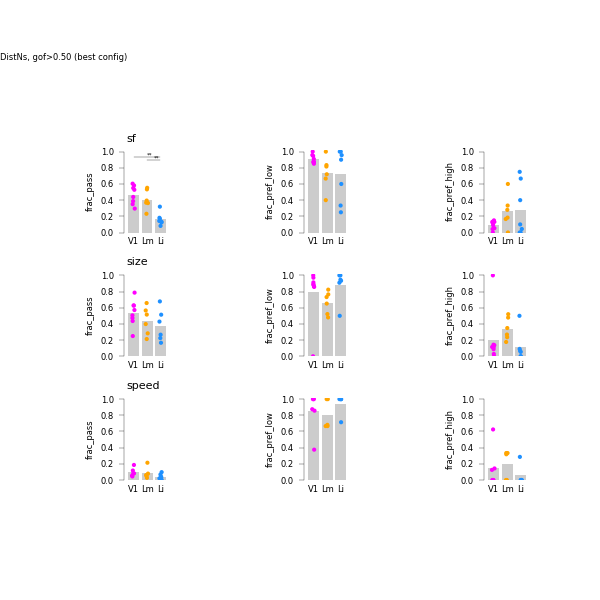

In [163]:
# plot
%matplotlib notebook

mean_type='mean'
plot_params = ['frac_pass', 'frac_pref_low', 'frac_pref_high']
fig, axn = pl.subplots(len(nonori_params), len(plot_params), figsize=(6,6))

for si, (par, pardf) in enumerate(plotd.groupby('param')):
    for mi, metric in enumerate(plot_params):    
        ax=axn[si, mi]
        if mi==0:
            ax.set_title(par, loc='left', fontsize=8)
        pplot.stripplot_metric_by_area(pardf, metric, area_colors=area_colors,
                                markersize=3, ylim=(0, 1.02), ax=ax,
                                sig_fontsize=4, jitter=True, 
                                plot_means=True, y_loc=0.9, offset=0.03,
                                mean_style='bar', mean_type=mean_type, aspect=2)
fig.text(0.0, 0.9, 'DistNs, gof>%.2f (best config)' % gof_thr)
pl.subplots_adjust(left=0.12, right=0.97, bottom=0.2, top=0.75, wspace=0.2,
                   hspace=0.5)

In [153]:
df

,n_pass,n_total,n_pref_low,n_pref_high,param,visual_area,datakey,n_cells,frac_pass,frac_pref_low,frac_pref_high
9,2,11,2,0,sf,Li,20190522_JC089_fov1,11,0.181818,1.000000,0.000000
11,0,11,0,0,speed,Li,20190522_JC089_fov1,11,0.000000,NaN,NaN
12,23,72,22,1,sf,Li,20190602_JC091_fov1,72,0.319444,0.956522,0.043478
13,37,72,35,2,size,Li,20190602_JC091_fov1,72,0.513889,0.945946,0.054054
14,7,72,5,2,speed,Li,20190602_JC091_fov1,72,0.097222,0.714286,0.285714
...,...,...,...,...,...,...,...,...,...,...,...
76,107,171,107,0,size,V1,20190622_JC085_fov1,171,0.625731,1.000000,0.000000
77,20,171,20,0,speed,V1,20190622_JC085_fov1,171,0.116959,1.000000,0.000000
78,47,89,45,2,sf,V1,20191006_JC110_fov1,89,0.528090,0.957447,0.042553
79,70,89,68,2,size,V1,20191006_JC110_fov1,89,0.786517,0.971429,0.028571


In [115]:
va='Li'
dk = '20190314_JC070_fov1'
g = NDATA[(NDATA.visual_area==va) & (NDATA.datakey==dk)]

rois_ = g['cell'].unique()
traceid_dir = traceutils.get_traceid_dir(dk, 'gratings', traceid='traces001')
fitdirs = glob.glob(os.path.join(traceid_dir, 'tuning*', ori_fit_desc))
if len(fitdirs)==0:
    print("no fits: %s" % dk)
    #continue
fitdir=fitdirs[0]
tmp_fov_outfile = os.path.join(fitdir, 'results_nonori_params.pkl')
if not os.path.exists(tmp_fov_outfile):
    missing_.append((va, dk))

with open(tmp_fov_outfile, 'rb') as f:
    res = pkl.load(f)

In [116]:
res

,value,reject_null,cell
param,,,
sf,0.0,True,175
size,0.0,True,175
speed,0.0,True,175
ori,270.0,True,175
sf,0.0,True,178
...,...,...,...
ori,135.0,True,316
sf,0.0,True,318
size,0.0,True,318
